<a href="https://colab.research.google.com/github/srivardhaniR/mahcine-learning-models-/blob/main/machine_learning_algorithms_for_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

SINGLE VARIABLE REGRESSION

In [ ]:
data =pd.read_csv('canada_per_capita_income.csv')

In [ ]:
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'per capita income (US$)')

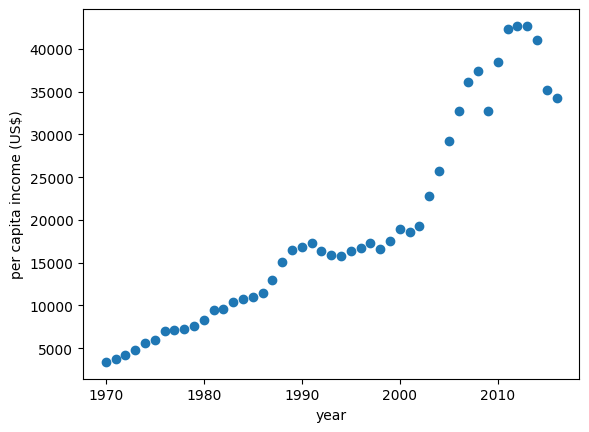

In [ ]:
plt.scatter(data['year'],data['per capita income (US$)'])
plt.xlabel('year')
plt.ylabel('per capita income (US$)')

In [ ]:
model=LinearRegression()
x=data[['year']]
y=data['per capita income (US$)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy=accuracy*100
accuracy

80.03604166786603

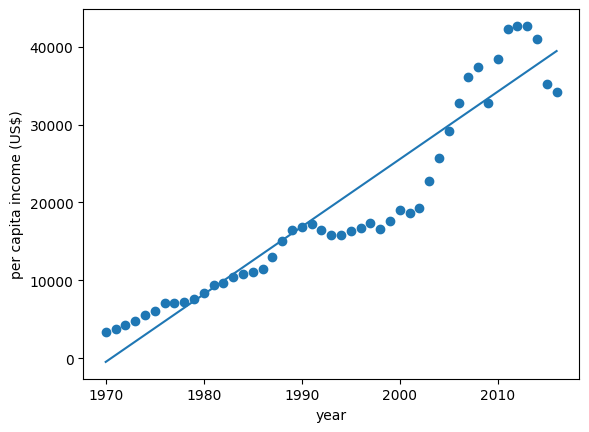

In [ ]:
plt.scatter(data['year'],data['per capita income (US$)'])
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.plot(x,model.predict(x))

MULTI VARIABLE LINEAR REGRESSION

HOUSE PRICE PREDICION


price=m1*area + m2*number of bedrooms + m3*age of the house + b
here.,
price is dependent varaible
m1,m2,m3 are coefficients
b is bias ot the slope
area,no.of bedrooms and age are indpendent variable

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
#lod the dataset
data=pd.read_csv('houseprices.csv')
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
#check whether there are null values or not
data.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


Text(0, 0.5, 'house_price')

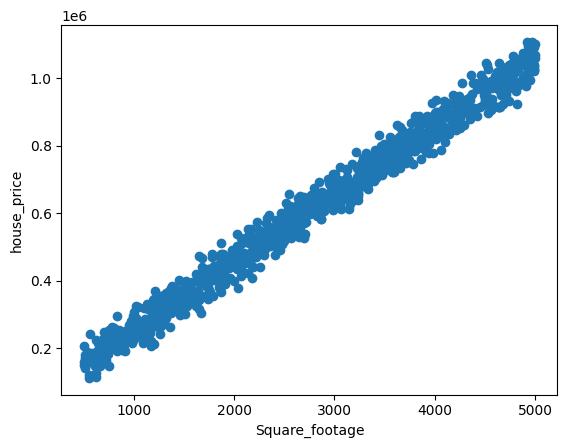

In [ ]:
plt.scatter(data['Square_Footage'],data['House_Price'])
plt.xlabel('Square_footage')
plt.ylabel('house_price')

In [ ]:
#check the nan or unknown values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None


In [ ]:
#split the data
x=data.drop('House_Price',axis=1)
y=data['House_Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_test.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
507,2031,3,2,1993,4.730994,2,10
818,1754,2,2,1998,0.919722,2,4
452,1667,1,2,1954,1.365395,1,8
368,4230,3,1,1951,3.079504,1,9
242,3854,2,1,1974,3.273415,1,8


In [ ]:
prediction=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy*100


99.84127604513719

GRADIENT DESECENT AND COST FUNCTION


In [ ]:
#we know weights and bias or intercept and slope but how to exactly find their value
#we know that the difference between actual and prediced should be less
#we use mean squared error or cost function to the difference:
# formula MSE:1/2n{( from 1 to n )Yi -Ypredicted)^2}
#then we use this in our gradient descent and find optimal step to reach the actual value using correct w and b
#formula w=(-2/n)*sum(x*(y-y_predicted))
#         b=(-2/n)*sum(y-y_predicted)
#change in w=w-learning_rate * derivative_of(cost_function)

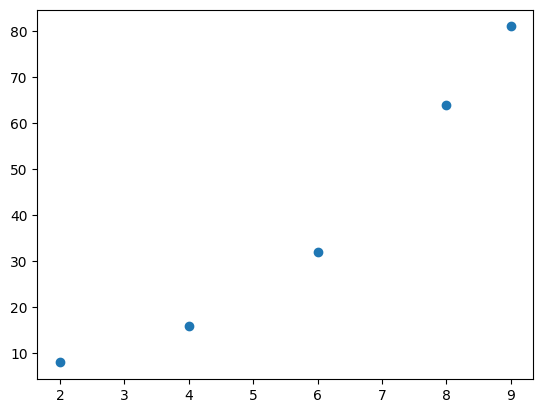

In [86]:
import numpy as np
x=np.array([2,4,6,8,9])
y=np.array([8,16,32,64,81])
#let us assume x in independent variable and y is dependent variable
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [113]:
#now lets initialize the weightss and bias
w=0.0
b=0.0
n=x.size
#initialize the learning rate
lr=0.00101
iterations =10
for i in range(iterations):
  y_predicted=w*x+b;
  mse=(1/n)*sum([val**2 for val in (y-y_predicted)])
  w_derivative=-(2/n)*sum(x*(y-y_predicted))
  b_derivative=-(2/n)*sum((y-y_predicted))
  w=w-lr*w_derivative
  b=b-lr*b_derivative
  print(" iteration:{}, mse:{}, weights: {}, bias: {}  predicted: {}".format(i,mse,w,b,y_predicted))



 iteration:0, mse:2400.2000000000003, weights: 0.6112520000000001, bias: 0.08120400000000001  predicted: [0. 0. 0. 0. 0.]
 iteration:1, mse:2039.3437470372098, weights: 1.1719165065280002, bias: 0.15508253948800002  predicted: [1.303708 2.526212 3.748716 4.97122  5.582472]
 iteration:2, mse:1735.8299821986825, weights: 1.686187251499259, bias: 0.22224309896775224  predicted: [ 2.49891555  4.84274857  7.18658158  9.53041459 10.7023311 ]
 iteration:3, mse:1480.5452899753209, weights: 2.157910301781007, bias: 0.28324279806927205  predicted: [ 3.5946176   6.9669921  10.33936661 13.71174111 15.39792836]
 iteration:4, mse:1265.8246466769976, weights: 2.5906128810130027, bias: 0.3385925705215059  predicted: [ 4.5990634   8.91488401 13.23070461 17.54652521 19.70443551]
 iteration:5, mse:1085.2212280459444, weights: 2.9875298020669927, bias: 0.3887609930151041  predicted: [ 5.51981833 10.70104409 15.88226986 21.06349562 23.6541085 ]
 iteration:6, mse:933.3128012626771, weights: 3.35162770822578

In [100]:
y_predicted

array([ 8.43823046, 16.36747741, 24.29672437, 32.22597132, 36.1905948 ])

In [101]:
y

array([ 8, 16, 32, 64, 81])

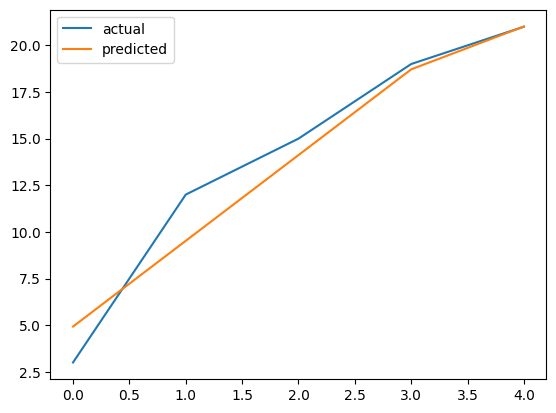

In [85]:
plt.plot(y)
plt.plot(y_predicted)
plt.legend(['actual','predicted'])